In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


df= pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')

#df.isnull().sum()

df

,Comunidade,Município,Estado,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
0,Comunidade 1,SÃO DOMINGOS DO CAPIM,Pará,25.6,86.5,22.9,2863.0,123.2,0,74.7,Sim,Não
1,Comunidade 2,SALINÓPOLIS,Pará,12.9,99.3,21.8,799.0,120.3,11,87.3,Sim,Não
2,Comunidade 3,TRACUATEUA,Pará,81.3,58.9,64.5,1924.0,104.8,5,43.9,Não,Sim
3,Comunidade 4,SÃO MIGUEL DO GUAMÁ,Pará,81.5,56.0,25.5,1715.0,42.3,0,5.3,Sim,Sim
4,Comunidade 5,MAGALHÃES BARATA,Pará,58.8,84.3,39.4,1990.0,89.4,9,17.0,Sim,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Comunidade 196,MOJUÍ DOS CAMPOS,Pará,67.5,74.3,25.4,2293.0,17.2,2,20.5,Sim,Sim
196,Comunidade 197,PORTO DE MOZ,Pará,73.3,46.8,87.2,1688.0,140.7,9,48.4,Não,Sim
197,Comunidade 198,TUCURUÍ,Pará,29.0,35.3,59.6,2190.0,103.8,2,20.3,Sim,Sim
198,Comunidade 199,CURUÇÁ,Pará,20.1,39.0,44.1,1531.0,12.0,6,17.5,Sim,Sim


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Comunidade                              200 non-null    object 
 1   Município                               200 non-null    object 
 2   Estado                                  200 non-null    object 
 3   Índice de Desmatamento (%)              200 non-null    float64
 4   Acesso à Água Potável (%)               200 non-null    float64
 5   Cobertura Vegetal (%)                   200 non-null    float64
 6   Renda Média Mensal (R$)                 200 non-null    float64
 7   Densidade Populacional (hab/km²)        200 non-null    float64
 8   Frequência de Queimadas (ano)           200 non-null    int64  
 9   Distância de Área Urbana (km)           200 non-null    float64
 10  Presença de Escola (Sim/Não)            0 non-null      float6

In [62]:
df['Presença de Escola (Sim/Não)'].value_counts()
df['Presença de Unidade de Saúde (Sim/Não)'].value_counts()
df['Frequência de Queimadas (ano)'].value_counts()


Frequência de Queimadas (ano)
11    23
5     22
0     19
10    19
1     19
8     17
3     16
9     15
7     15
2     14
6     13
4      8
Name: count, dtype: int64

In [59]:
df[ 'Presença de Escola (Sim/Não)'] = df['Presença de Escola (Sim/Não)'].map({'Sim': 1, 'Não': 0})
df['Presença de Unidade de Saúde (Sim/Não)'] = df['Presença de Unidade de Saúde (Sim/Não)'].map({'Sim': 1, 'Não': 0})

#df = pd.get_dummies(df, columns=['Presença de Unidade de Saúde (Sim/Não)', 'Presença de Escola (Sim/Não)'])

df0=df.drop(['Comunidade','Município','Estado'],axis=1)

df0.describe()

,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,47.588000,67.678000,49.45950,1614.530000,82.469500,5.670000,50.146500,0.77500,0.595000
std,25.011311,21.344876,23.47915,746.032763,44.554248,3.653469,26.716665,0.41863,0.492124
min,5.400000,30.800000,11.70000,412.000000,2.900000,0.000000,1.900000,0.00000,0.000000
25%,26.000000,51.400000,27.72500,944.750000,41.100000,2.000000,28.400000,1.00000,0.000000
50%,51.050000,68.700000,47.65000,1576.000000,89.750000,6.000000,51.800000,1.00000,1.000000
75%,67.550000,86.925000,69.40000,2195.250000,123.125000,9.000000,68.950000,1.00000,1.000000
max,89.200000,100.000000,94.10000,2992.000000,149.700000,11.000000,99.300000,1.00000,1.000000


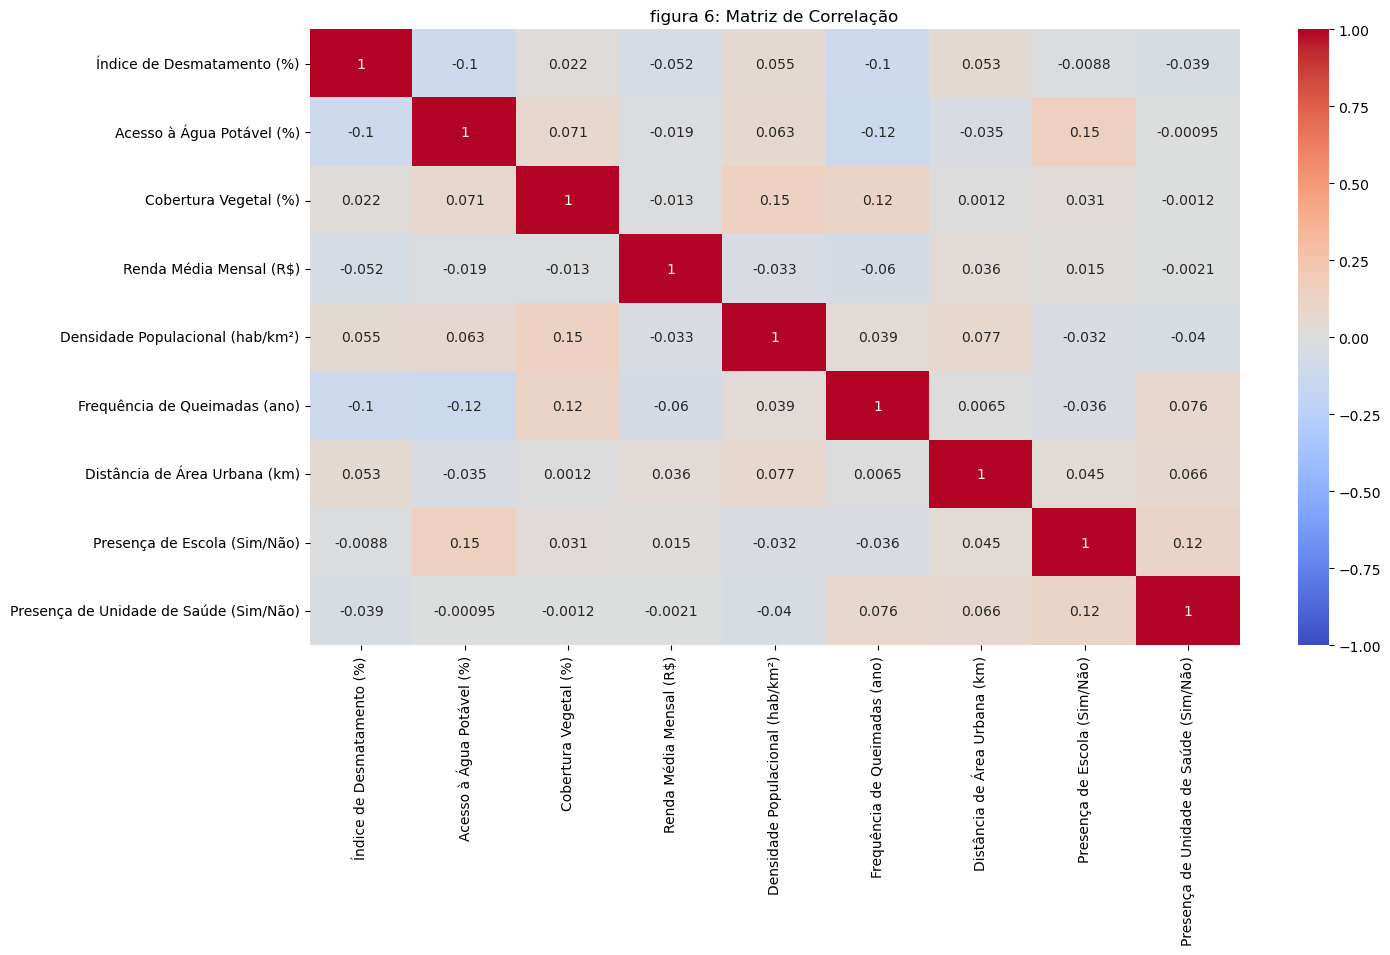

In [60]:
correlation_matrix = df0.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('figura 6: Matriz de Correlação')
plt.show()

In [61]:
correlation_matrix 


,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
Índice de Desmatamento (%),1.000000,-0.104926,0.021803,-0.052257,0.055411,-0.103270,0.052848,-0.008802,-0.039263
Acesso à Água Potável (%),-0.104926,1.000000,0.070748,-0.019238,0.062563,-0.117572,-0.035149,0.154770,-0.000948
Cobertura Vegetal (%),0.021803,0.070748,1.000000,-0.012554,0.145006,0.116379,0.001207,0.030510,-0.001166
Renda Média Mensal (R$),-0.052257,-0.019238,-0.012554,1.000000,-0.032826,-0.059823,0.035842,0.015428,-0.002136
Densidade Populacional (hab/km²),0.055411,0.062563,0.145006,-0.032826,1.000000,0.038724,0.076578,-0.032026,-0.039986
Frequência de Queimadas (ano),-0.103270,-0.117572,0.116379,-0.059823,0.038724,1.000000,0.006542,-0.035648,0.076217
Distância de Área Urbana (km),0.052848,-0.035149,0.001207,0.035842,0.076578,0.006542,1.000000,0.044792,0.065611
Presença de Escola (Sim/Não),-0.008802,0.154770,0.030510,0.015428,-0.032026,-0.035648,0.044792,1.000000,0.116470
Presença de Unidade de Saúde (Sim/Não),-0.039263,-0.000948,-0.001166,-0.002136,-0.039986,0.076217,0.065611,0.116470,1.000000
